# 자연어 처리(Natual Language Processing)

- 설치 목록
   - JDK(Java SE Downloads) - Skip
   - JAVA_HOME 설정 - Skip
   - JPype 설치 : 파이썬에서 자바 클래스를 호출해 사용할 수 있게 해줌.
   - KoNLPy 설치
   - Word Cloud 설치

## 한글 자연어 정보 처리 라이브러리 - KoNLPy 및 필요 모듈 설치

### KoNLPy

 - KoNLPy는 자바 기반의 형태소 분석기를 파이썬에서 사용할 수 있게 해주는 라이브러리이다.
 - 국내외에서 개발한 여러 형태소 분석기를 포함하고 있으며 자연어처리에 필요한 사전, 말뭉치, 도구 등을  
   포함하여 손쉽게 한국어 분석을 할 수 있게 도와준다.
 - 파이썬으로 한글 자연어를 처리하기 위해서는 java기반으로 만들어진 형태소 분석기를 사용한다.
 - KoNLPy가 지원하는 형태소 분석기는 총 5가지가 존재한다.(형태소 토크나이징)
     - hannanum(한나눔)
     - kkma(꼬꼬마)
     - komoran(코모란)
     - twitter(트위터)
     - mecab(메캅) - 이 친구는 윈도우에서 사용 불가

## 한글 자연어 처리 기초

In [2]:
from konlpy.tag import Kkma
kkma = Kkma()

In [3]:
# 형태소 분석기 호출
# 마침표가 없어도 문장을 나눠서 추출
kkma.sentences('한국어 분석을 시작합니다. 재미있어요~~')

['한국어 분석을 시작합니다.']

In [4]:
# 명사 추출
kkma.nouns('한국어 분석을 시작합니다. 재미있어요~~')

['한국어', '분석']

In [5]:
# 형태소 분석
# 한글은 영어와 달리 단어의 형태 변화가 많아서 영어처럼 쉽게 접근하기 어렵다.
# 그래서 최소한의 의미 단위인 형태소로 언어를 분석하는 것이 일반적임.

kkma.pos('한국어 분석을 시작합니다. 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

 - 다른 형태소 분석기 한나눔 사용

In [7]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [8]:
# 꼬꼬마 엔진과는 약간 다른 결과
hannanum.nouns('한국어 분석을 시작합니다. 재미있어요~~')

['한국어', '분석', '시작']

In [9]:
# 한나눔의 형태소 분석 결롸
hannanum.morphs('한국어 분석을 시작합니다. 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '.', '재미있', '어요', '~~']

In [10]:
hannanum.pos('한국어 분석을 시작합니다. 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('.', 'S'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

 - 트위터 분석

In [11]:
from konlpy.tag import Okt
t = Okt()

In [13]:
# 정규화 : 어지럽힌 문장을 제대로 분석할 수 있도록 다듬어줌.
text = '안녕하세용 ㅋㅋㅋ 반가워요 샤릉해~ㅎ'
t.normalize(text)

'안녕하세요 ㅋㅋㅋ 반가워요 사랑해~ㅎ'

In [14]:
# 명사데이터를 리스트 형태로 반환
text = '한국어 분석을 시작합니다. 재미있어요~'
t.nouns(text)

['한국어', '분석', '시작']

In [16]:
# 어간 분석
text = '''한국 증시는 10월24일 일제히 반등에 성공해, 살짝 오른 틈을 이용해서
기관투자가와 공매도들은 일제히 언론 플레이를 하고 개미들은 이제 저점인것으로 착각하고 다시 불속으로 뛰어드는데......'''
t.phrases(text)

['한국',
 '한국 증시',
 '10월24일',
 '10월24일 일제',
 '반등',
 '살짝',
 '살짝 오른',
 '살짝 오른 틈',
 '이용',
 '기관투자가',
 '기관투자가와 공매도들',
 '일제',
 '언론',
 '언론 플레이',
 '개미들',
 '이제',
 '이제 저점',
 '착각',
 '다시',
 '다시 불속',
 '증시',
 '오른',
 '기관',
 '투자가',
 '공매도들',
 '플레이',
 '저점',
 '불속']

In [17]:
# morphs : 형태소 분석, 품사가 없는 것이 단점
'''
형태소 기반으로 리스트 형식으로 리턴해주는데 태그가 없기 때문에 어떤 형태소가 어떤 품사인지 알수 없음
'''

text = '한국어 분석을 시작합니다 재미있어요~~'
t.morphs(text)

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [18]:
text = '''이육사, 한국의 민족저항 시인으로 일제 식민지하의 민족적 
비운을 소재로 삼아 강렬한 저항의지를 나타내고, 꺼지지 않는 민족정신을 장엄하게 노해한 것이 특징이다.'''

t.pos(text)
t.pos(text, join = True)

['이육사/Noun',
 ',/Punctuation',
 '한국/Noun',
 '의/Josa',
 '민족/Noun',
 '저항/Noun',
 '시인/Noun',
 '으로/Josa',
 '일제/Noun',
 '식민지/Noun',
 '하의/Noun',
 '민족/Noun',
 '적/Suffix',
 '비운/Noun',
 '을/Josa',
 '소재/Noun',
 '로/Josa',
 '삼아/Verb',
 '강렬한/Adjective',
 '저항/Noun',
 '의지/Noun',
 '를/Josa',
 '나타내고/Verb',
 ',/Punctuation',
 '꺼지지/Verb',
 '않는/Verb',
 '민족/Noun',
 '정신/Noun',
 '을/Josa',
 '장엄하게/Adjective',
 '노해/Noun',
 '한/Josa',
 '것/Noun',
 '이/Josa',
 '특징/Noun',
 '이다/Josa',
 './Punctuation']

## 워드 클라우드

* 자주 언급되는 단어를 크게 보여줌으로서 직관적으로 텍스트를 알리는 데 도움을 준다.
* 자료의 빈도를 시각적으로 나타내는 시각화 방법 중 하나

In [19]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np

# pillow : 파이썬에서 이미지 분석 및 처리를 쉽게 할 수 있는 이미지 프로세싱 라이브러리
from PIL import Image

 - 이상한 나라의 앨리스 영문 버전을 다운 받아서 data 폴더에 저징
 - 앨리스 그림도 저장

In [21]:
# 텍스트 문서 읽어오기
text = open('./data/alice.txt').read()

# 엘리스 이미지 읽어오기
alice_mask = np.array(Image.open('./data/alice_mask.png'))

# 연관도가 떨어지는 단어 제외
stopwords = set(STOPWORDS)
stopwords.add('said')

In [22]:
import matplotlib.pyplot as plt

# 한글폰트 설정
plt.rc('font', family='AppleGothic')

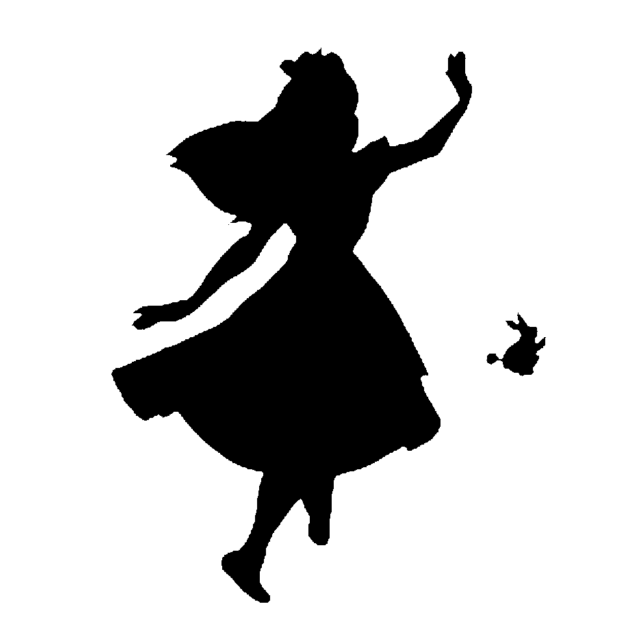

In [23]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

 - 워드 클라우드가 문서 자체에서 단어를 카운트하는 기능을 제공하니 그것을 사용해서 최빈 단어를 찾는다.

In [24]:
# max_words : 워드클라우드에 넣을 최대 글자수
# stopwords : 제외할 단어
wc = WordCloud(background_color= 'white',
               max_words=2000,
               mask=alice_mask,
               stopwords=stopwords)

wc = wc.generate(text)

wc.words_ # 처리 결과를 딕셔너리 형태로 반환

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

 - 처리 결과 Alice 단어가 가장 많이 등장하였다.
 - 이제 위에 코드 결과를 엘리스 그림에 겹쳐 보이게 하면됨.

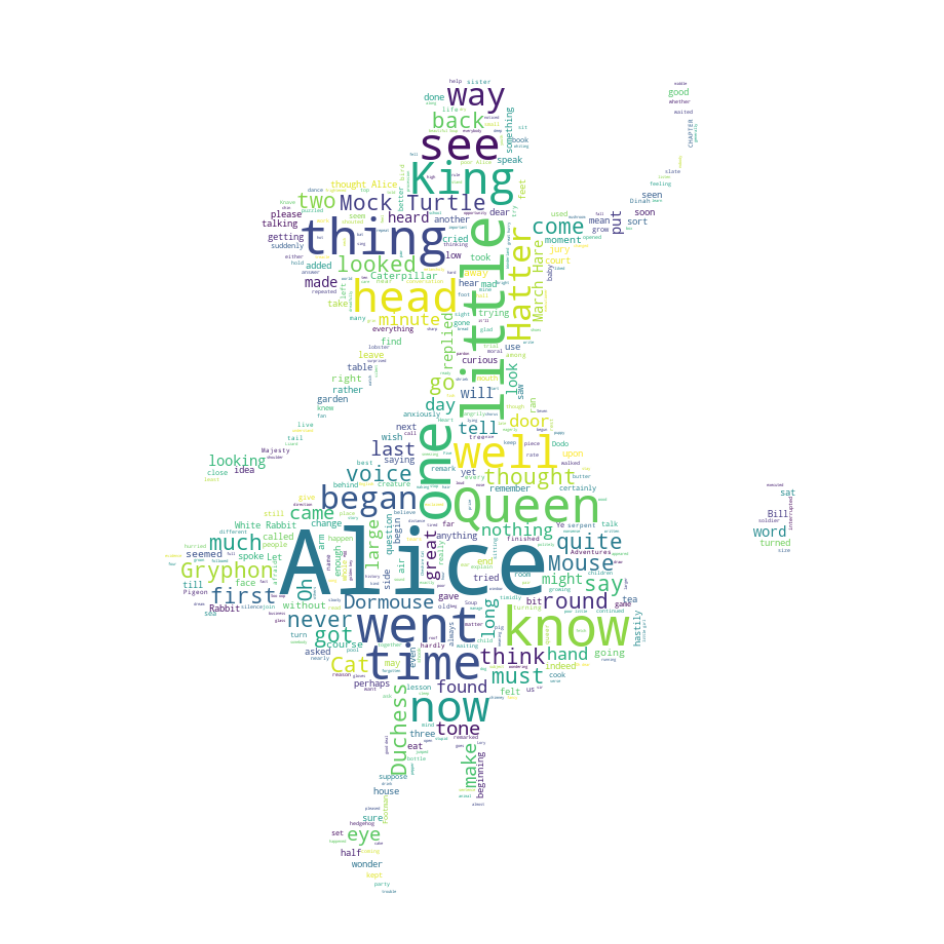

In [25]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()